# **Задание №1**

Реализовать функцию скользящего окна для заданного одномерного ряда данных, формирующую из него матрицу по следующему правилу как на Рисунке

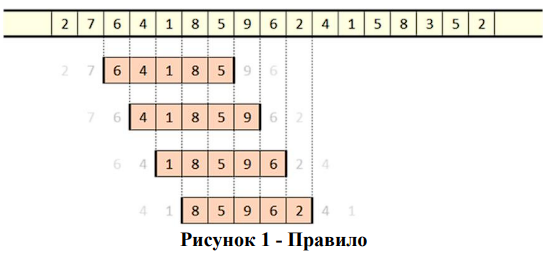

In [6]:
import numpy as np

def sliding_window(a, w, step):
    num_windows = (len(a) - w) // step + 1
    windows = []

    for i in range(num_windows):
        start = i * step
        end = start + w
        windows.append(a[start:end])

    return np.array(windows)

window = 3
step_s = 1
x1 = np.array([8, 1, 4, 5, -2, 5, 9, 0])
A1 = np.array([[8, 1, 4],
            [1, 4, 5],
            [4, 5, -2],
            [5, -2, 5],
            [-2, 5, 9],
            [5, 9, 0]])
print(np.array_equal(sliding_window(x1, w=window, step=step_s), A1))
window = 2
step_s = 4
x2 = np.array([8, 3, 4, 1, -6, 5, 9, 2, 10, 11, -14, 0])
A2 = np.array([[8, 3],
            [-6, 5],
            [10, 11]])
print(np.array_equal(sliding_window(x2, w=window, step=step_s), A2))


True
True


# **Задание №2**

1. Сколько мужчин и женщин (признак sex) представлено в этом наборе данных?

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"

names = ["age", "workclass", "fnlwgt", "education",
        "education-num", "marital-status", "occupation", "relationship",
        "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "salary"]

c = pd.read_csv(url, names=names)

Name_list = c["sex"].tolist()

print("Converting name to list:")

cnt1 = cnt2 = 0
for i in range(len(Name_list)):
    if Name_list[i] == " Male":
        cnt1 += 1
    else:
        cnt2 += 1
print("Количество мужчин:", cnt1)
print("Количество женщин:", cnt2)

Converting name to list:
Количество мужчин: 21790
Количество женщин: 10771


2. Каков средний возраст (признак age) женщин?

In [8]:
average = c[c['sex'] == ' Female']['age'].mean()
print("Средний возраст женщин:", average)

Средний возраст женщин: 36.85823043357163


3. Какова доля граждан Германии (признак native-country)?

In [9]:
country_list = c["native-country"].tolist()
country_list

cnt3 = 0
for i in range(len(country_list)):
    if country_list[i] == " Germany":
        cnt3 += 1
print("Доля:", cnt3 / len(c["native-country"]))

Доля: 0.004207487485028101


4. Постройте гистограмму распределения (bar plot) образования людей (признак education).


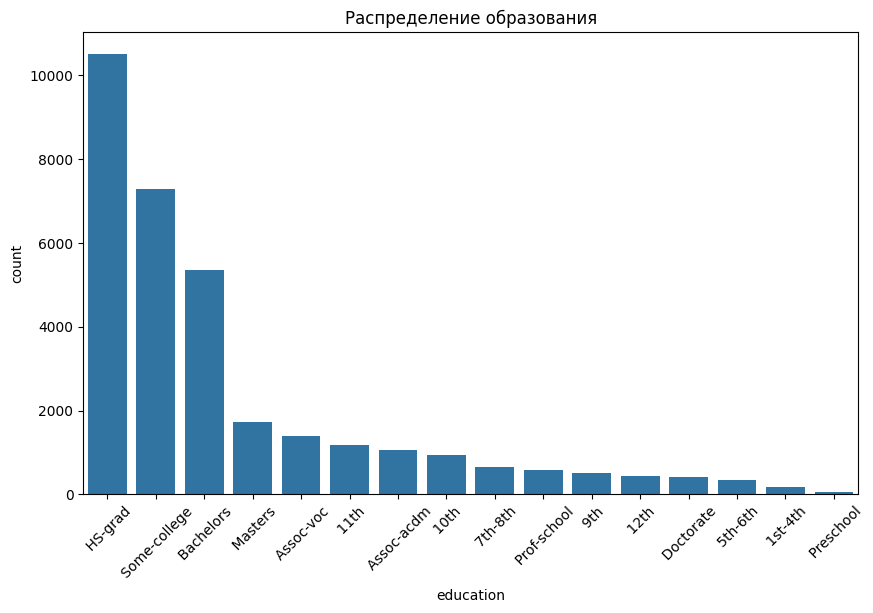

In [10]:
plt.figure(figsize=(10, 6))
sns.countplot(data=c, x='education', order=c['education'].value_counts().index)
plt.title('Распределение образования')
plt.xticks(rotation=45)
plt.show()

5. Каковы средние значения и среднеквадратичные отклонения возраста тех, кто получает менее 50K в год?

In [11]:
c[c['salary'] == ' <=50K']['age'].mean()

36.78373786407767

In [12]:
c[c['salary'] == ' <=50K']['age'].std()

14.02008849082488

6. Правда ли, что люди, которые получают больше 50k, имеют как минимум высшее образование?

In [13]:
people_50K = c[c["salary"] == " >50K"]

education = ['Bachelors', 'Prof-school', 'Assoc-acdm', 'Assoc-voc', 'Masters', 'Doctorate']

higher_educ = people_50K['education'].isin(education).all()
higher_educ

False

7. Выведите статистику возраста для каждой расы (признак race) и каждого пола.

In [14]:
c.groupby(['race','sex'])['age'].describe()

count       mean        std   min   25%   50%  \
race                sex                                                        
 Amer-Indian-Eskimo  Female    119.0  37.117647  13.114991  17.0  27.0  36.0   
                     Male      192.0  37.208333  12.049563  17.0  28.0  35.0   
 Asian-Pac-Islander  Female    346.0  35.089595  12.300845  17.0  25.0  33.0   
                     Male      693.0  39.073593  12.883944  18.0  29.0  37.0   
 Black               Female   1555.0  37.854019  12.637197  17.0  28.0  37.0   
                     Male     1569.0  37.682600  12.882612  17.0  27.0  36.0   
 Other               Female    109.0  31.678899  11.631599  17.0  23.0  29.0   
                     Male      162.0  34.654321  11.355531  17.0  26.0  32.0   
 White               Female   8642.0  36.811618  14.329093  17.0  25.0  35.0   
                     Male    19174.0  39.652498  13.436029  17.0  29.0  38.0   

                               75%   max  
race                sex                   
 Amer-Indian-Eskimo  Female  46.00  80.0  
                     Male    45.00  82.0  
 Asian-Pac-Islander  Female  43.75  75.0  
                     Male    46.00  90.0  
 Black               Female  46.00  90.0  
                     Male    46.00  90.0  
 Other               Female  39.00  74.0  
                     Male    42.00  77.0  
 White               Female  46.00  90.0  
                     Male    49.00  90.0

8. Среди кого больше доля зарабатывающих много (>50K): среди женатых или холостых мужчин?

In [15]:
c['marital_status'] = c['marital-status'].apply(lambda x: ' Married' if x.startswith(' Married') else ' Single')
money = c[c['salary'] == ' >50K']
m = money[money['sex'] == ' Male']
l1 = m["marital_status"].tolist()
cnt5 = cnt6 = 0
for i in range(len(l1)):
    if l1[i] == " Single":
        cnt5 += 1
    else:
        cnt6 += 1


money1 = c[c['salary'] == ' <=50K']
m1 = money1[money1['sex'] == ' Male']
l2 = m1["marital_status"].tolist()
cnt7 = cnt8 = 0
for i in range(len(l2)):
    if l2[i] == " Single":
        cnt7 += 1
    else:
        cnt8 += 1

print(cnt5 / (cnt5 + cnt7)) # холостые
print(cnt6 / (cnt6 + cnt8)) # женатые

0.08449509031397745
0.4405139945351156


<BarContainer object of 2 artists>

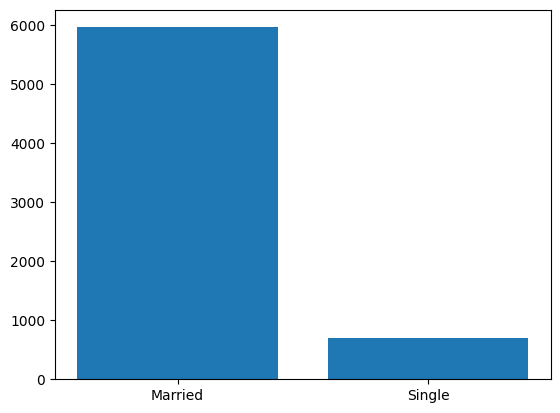

In [16]:
x = ['Married', 'Single']
ll = [cnt6, cnt5]
plt.bar(x, ll)

9. Какое максимальное число часов человек работает в неделю (признак hours-per-week)? Сколько людей работают такое количество часов и каков среди них процент зарабатывающих много?

In [17]:
max_hours_per_week = c['hours-per-week'].max()
max_hours_count = len(c[c['hours-per-week'] == c['hours-per-week'].max()])
count_many_money = len(money[money['hours-per-week'] == max_hours_per_week])
print("Максимальное число часов:", max_hours_per_week)
print("Количество людей:", max_hours_count)
print("Процент зарабатывающих много:", count_many_money / max_hours_count)

Максимальное число часов: 99
Количество людей: 85
Процент зарабатывающих много: 0.29411764705882354


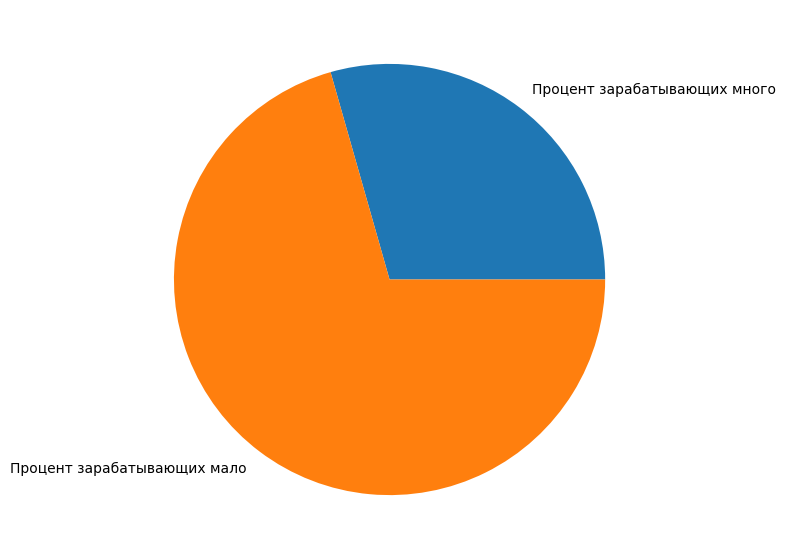

In [18]:
naz = ['Процент зарабатывающих много', 'Процент зарабатывающих мало']

chisla = [(count_many_money / max_hours_count), 1 - (count_many_money / max_hours_count)]

fig = plt.figure(figsize=(10, 7))
plt.pie(chisla, labels=naz)

plt.show()

10. Среднее время работы (hours-per-week) зарабатывающих мало и много (salary) для каждой страны (native-country)

In [19]:
table = c.groupby(['native-country', 'salary'])['hours-per-week'].mean()
table

native-country  salary
 ?               <=50K    40.164760
                 >50K     45.547945
 Cambodia        <=50K    41.416667
                 >50K     40.000000
 Canada          <=50K    37.914634
                            ...    
 United-States   >50K     45.505369
 Vietnam         <=50K    37.193548
                 >50K     39.200000
 Yugoslavia      <=50K    41.600000
                 >50K     49.500000
Name: hours-per-week, Length: 82, dtype: float64

# **Задание 3**

In [20]:
!pip install opendatasets

In [21]:
import opendatasets as od


od.download('https://www.kaggle.com/datasets/thebumpkin/178-queen-album-tracks-with-spotify-data')

Skipping, found downloaded files in "./178-queen-album-tracks-with-spotify-data" (use force=True to force download)


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


f = ('/content/178-queen-album-tracks-with-spotify-data/QueenAllTracks.csv')
data = pd.read_csv(f)
data

,Track,Album,Year,Duration,Time_Signature,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Popularity
0,Doing Alright - Remastered 2011,Queen,1973,249213,4,0.341,0.293,9,-12.408,1,0.0356,0.75600,0.000023,0.0833,0.178,93.294,32
1,Great King Rat - Remastered 2011,Queen,1973,343013,4,0.350,0.851,4,-12.363,0,0.2080,0.04040,0.000619,0.1150,0.428,135.276,26
2,Jesus - Remastered 2011,Queen,1973,224173,4,0.356,0.740,11,-7.077,0,0.1630,0.15300,0.000001,0.1650,0.531,114.756,22
3,Keep Yourself Alive - 2011 Mix,Queen,1973,226720,4,0.419,0.721,2,-9.498,1,0.0792,0.25000,0.000042,0.1040,0.593,134.204,31
4,Liar - Remastered 2011,Queen,1973,383920,4,0.261,0.787,2,-7.227,1,0.2120,0.00279,0.062600,0.1780,0.267,149.084,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
703,The Invisible Man - Remastered 2011,The Miracle (Collector's Edition),2022,242533,4,0.707,0.803,0,-6.940,1,0.0444,0.17900,0.012600,0.3140,0.574,119.994,23
704,The Miracle - Original Take With John’s Ending,The Miracle (Collector's Edition),2022,285520,4,0.394,0.738,1,-8.003,1,0.0488,0.10600,0.000101,0.4040,0.525,92.131,18
705,The Miracle - Remastered 2011,The Miracle (Collector's Edition),2022,302173,4,0.495,0.641,1,-6.008,1,0.0264,0.16500,0.000001,0.4160,0.498,92.012,24
706,Was It All Worth It - Remastered 2011,The Miracle (Collector's Edition),2022,345640,4,0.328,0.861,9,-5.255,0,0.0647,0.21200,0.000063,0.0780,0.141,89.432,20


1. Сколько песен вышло в 2011 году?

In [23]:
song2011 = data[data['Year'] == 2011]
song2011

,Track,Album,Year,Duration,Time_Signature,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Popularity
383,A Kind Of Magic - Demo / August 1985,A Kind of Magic (Deluxe Remastered Version),2011,203267,4,0.689,0.505,9,-6.398,1,0.0321,0.01220,0.000306,0.0980,0.6540,117.546,10
384,A Kind Of Magic - Highlander Version,A Kind of Magic (Deluxe Remastered Version),2011,262080,4,0.575,0.726,9,-7.029,1,0.0377,0.06880,0.000090,0.0679,0.3690,130.292,20
385,A Kind Of Magic - Remastered 2011,A Kind of Magic (Deluxe Remastered Version),2011,264253,4,0.671,0.775,9,-5.873,1,0.0354,0.01800,0.002830,0.1210,0.6950,130.121,55
386,Don't Lose Your Head - Remastered 2011,A Kind of Magic (Deluxe Remastered Version),2011,278133,4,0.528,0.918,9,-6.008,0,0.0712,0.00507,0.156000,0.2580,0.3030,120.010,21
387,Forever - Piano Version,A Kind of Magic (Deluxe Remastered Version),2011,200693,4,0.260,0.132,4,-16.152,0,0.0357,0.96100,0.935000,0.1480,0.0394,137.451,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
556,Machines (or 'Back To Humans') - Remastered 2011,The Works (Deluxe Remastered Version),2011,307080,4,0.623,0.932,0,-6.105,1,0.0786,0.05950,0.005240,0.3720,0.3830,111.509,21
557,Man On The Prowl - Remastered 2011,The Works (Deluxe Remastered Version),2011,205640,4,0.529,0.866,7,-5.459,1,0.0344,0.29000,0.000047,0.5380,0.9120,150.238,22
558,Radio Ga Ga - Remastered 2011,The Works (Deluxe Remastered Version),2011,348227,4,0.744,0.502,5,-7.705,1,0.0359,0.17900,0.000172,0.1900,0.6550,112.345,63
559,Tear It Up - Remastered 2011,The Works (Deluxe Remastered Version),2011,204627,4,0.506,0.871,2,-5.050,1,0.0634,0.16800,0.000000,0.1310,0.3060,90.013,30


In [24]:
len(song2011)

178

2. Вычислить сумму длительности песен написанный в 1973 году?

In [25]:
def convert_duration(ms):
    seconds = ms // 1000
    minutes = seconds // 60
    seconds = seconds % 60
    return f'{minutes:02}:{seconds:02}'

In [26]:
m = data[data['Year'] == 1973]['Duration'].sum()
print(convert_duration(m))


38:42


3. Распределите песни по названиям нот

In [27]:
key_mapping = {
    0: 'C', 1: 'C#', 2: 'D', 3: 'D#', 4: 'E', 5: 'F',
    6: 'F#', 7: 'G', 8: 'G#', 9: 'A', 10: 'A#', 11: 'B'
}

data['Key Signature'] = data['Key'].map(key_mapping)

key_counts = data['Key Signature'].value_counts()

key_counts_data = pd.DataFrame({'Key Signature': key_counts.index, 'Count': key_counts.values})
key_counts_data

,Key Signature,Count
0,D,154
1,A,115
2,G,88
3,E,81
4,C,73
5,F,48
6,B,39
7,D#,28
8,C#,28
9,A#,22


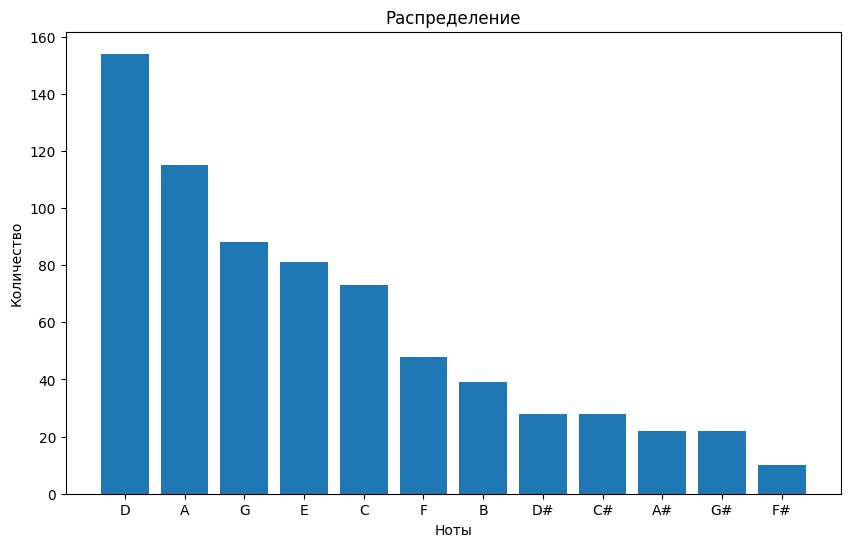

In [28]:
plt.figure(figsize=(10, 6))
plt.bar(key_counts_data['Key Signature'], key_counts_data['Count'])
plt.xlabel('Ноты')
plt.ylabel('Количество')
plt.title('Распределение')
plt.show()

4. Количество выпущенных песен, написанный в темпе от 155 до 160 bpm

In [29]:
filtered_tracks = data[(data['Tempo'] >= 155) & (data['Tempo'] <= 160)]
len(filtered_tracks)

10

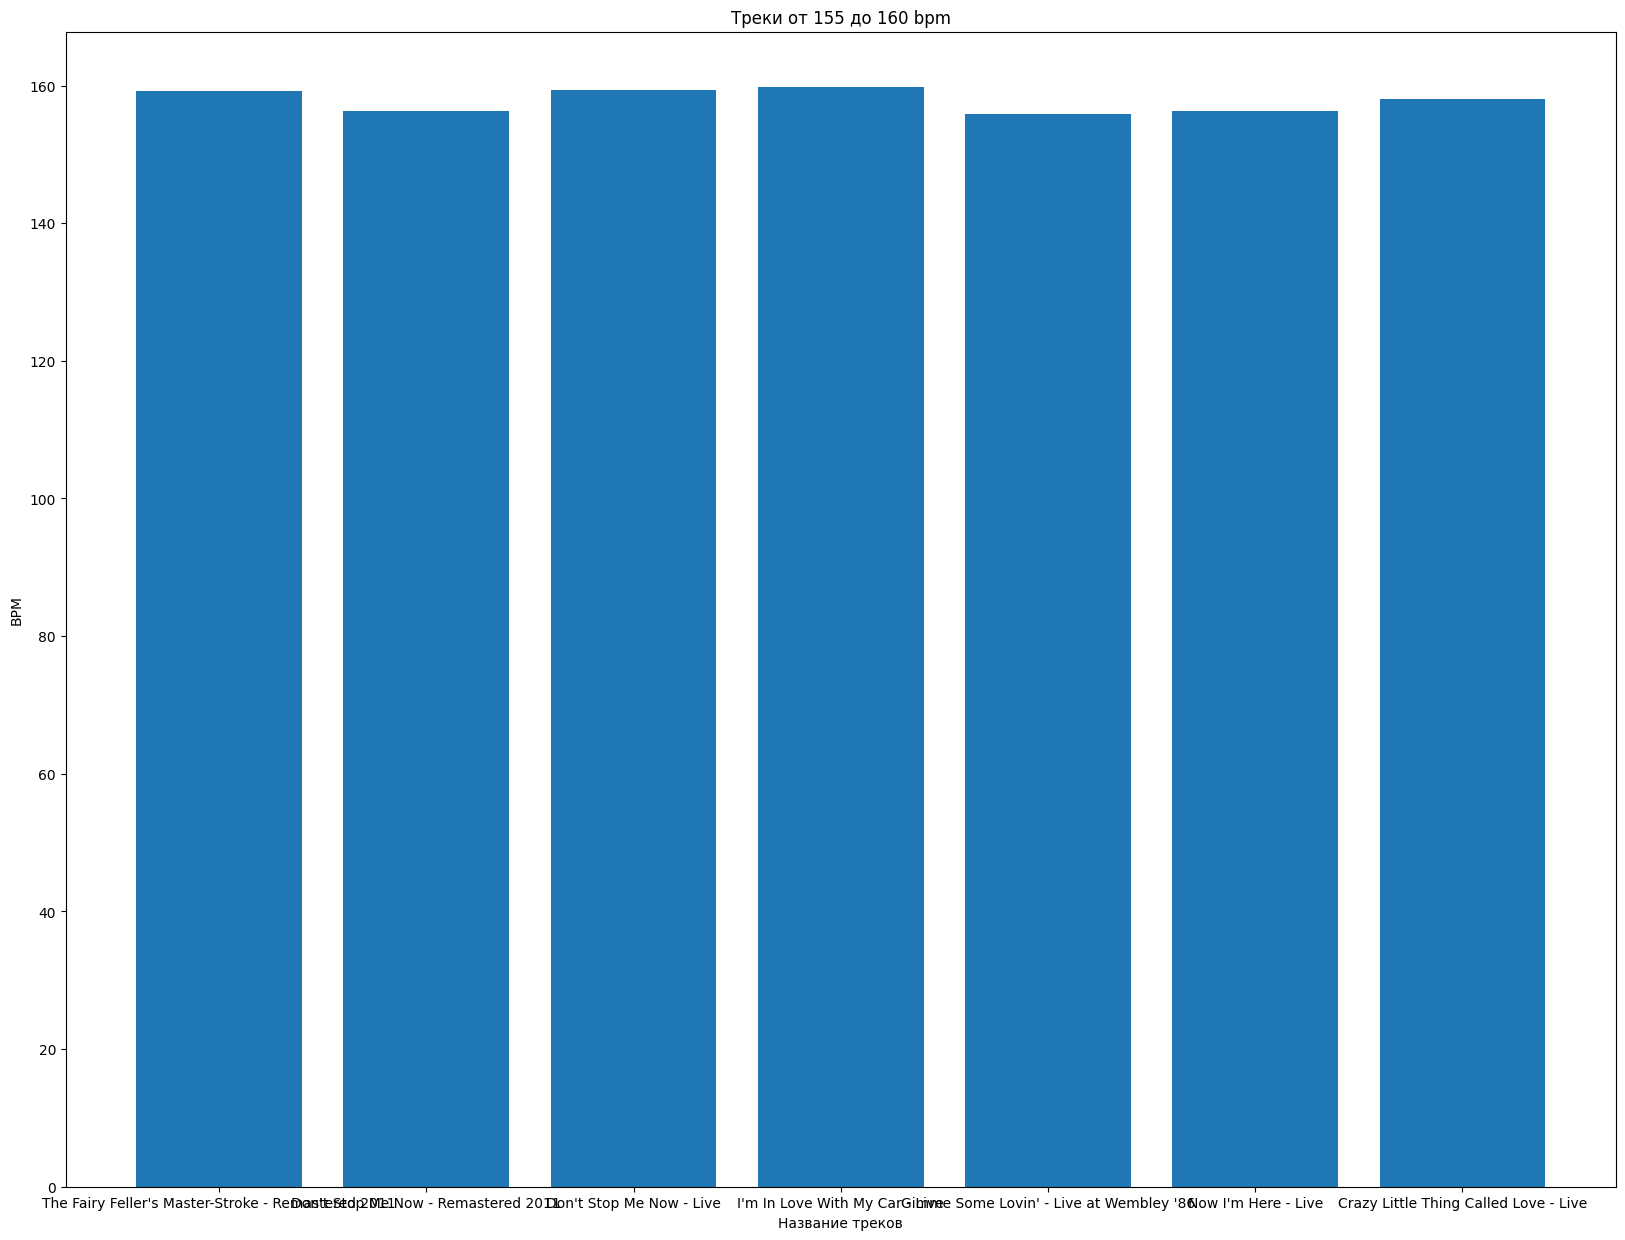

In [30]:
plt.figure(figsize=(20, 15))
plt.bar(filtered_tracks['Track'], filtered_tracks['Tempo'])
plt.xlabel('Название треков')
plt.ylabel('BPM')
plt.title('Треки от 155 до 160 bpm')
plt.show()

5. Какой самый популярный альбом?

In [31]:
data_sorted = data.sort_values(by='Popularity', ascending=False)
data_sorted.iloc[0]['Album']

'Jazz (Deluxe Remastered Version)'

6. Топ 10 лучших песен группы

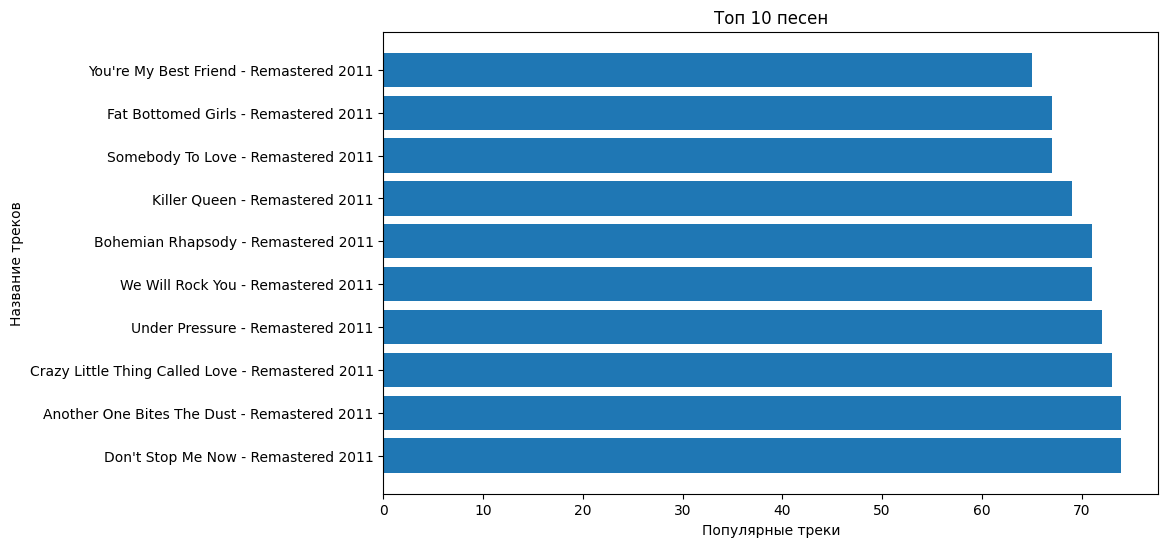

In [32]:
data_sorted10 = data_sorted[:10]
plt.figure(figsize=(10, 6))
plt.barh(data_sorted10['Track'], data_sorted10['Popularity'])
plt.xlabel('Популярные треки')
plt.ylabel('Название треков')
plt.title('Топ 10 песен')
plt.show()

In [33]:
data_sorted.iloc[0]

,302
Track,Don't Stop Me Now - Remastered 2011
Album,Jazz (Deluxe Remastered Version)
Year,2009
Duration,209413
Time_Signature,4
Danceability,0.563
Energy,0.865
Key,5
Loudness,-5.277
Mode,1


7. Какие песни энергичны (Energy) в альбоме Innuendo?

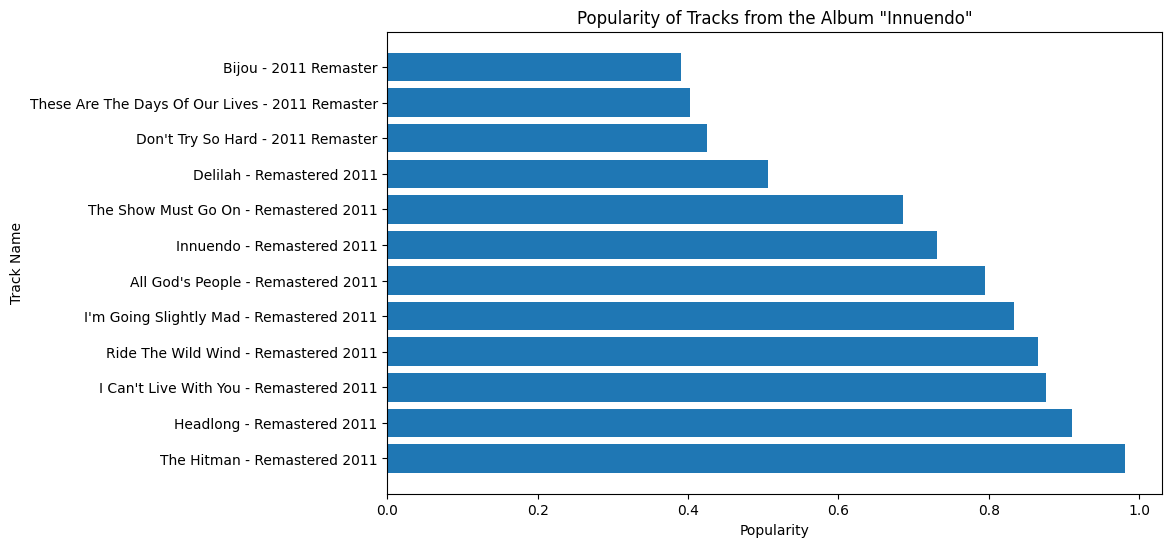

In [34]:
innuendo_tracks = data[data['Album'] == 'Innuendo']

sorted_innuendo_tracks = innuendo_tracks.sort_values(by='Energy', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(sorted_innuendo_tracks['Track'], sorted_innuendo_tracks['Energy'])
plt.xlabel('Popularity')
plt.ylabel('Track Name')
plt.title('Popularity of Tracks from the Album "Innuendo"')
plt.show()

8. Какой процент написаны песни в размере 3/4 из творчества Queen?

In [35]:
len(data[data['Time_Signature'] == 3])
len(data)
dolya = len(data[data['Time_Signature'] == 3]) / len(data)
print(dolya * 100)

11.440677966101696


9. Посчитайте среднее число (Valence) из альбома Hot Space

In [36]:
hot_space_data = data[data['Album'] == 'Hot Space']

average_valence = hot_space_data['Valence'].mean()
print('Среднее значение Valence из альбома "Hot Space":', average_valence)

Среднее значение Valence из альбома "Hot Space": 0.5386666666666667


10. У них написано больше мажорных песен или минорных песен?

In [37]:
dur = data[data['Mode'] == 1]
moll = data[data['Mode'] == 0]

if len(dur) > len(moll):
    print("Мажорных песен больше")
    print(len(dur))
elif len(dur) < len(moll):
    print("Минорных песен больше")
    print(len(moll))
else:
    print("Мажорных и минорных песен одинаковы")
    print(len(moll))

Мажорных песен больше
528
